In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image
import numpy as np
import re

from textblob import TextBlob

import sys
import matplotlib.pyplot as plt
import pandas as pd

import nltk
import pycountry
from nltk.stem import SnowballStemmer

from langdetect import detect

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS
import os
from PIL import Image

import numpy as np

from sklearn.feature_extraction.text import CountVectorizer


In [7]:
# Request for foursquare and checking status code   
url = 'https://www.bbb.org/us/wa/bellevue/profile/cell-phone-supplies/t-mobile-usa-inc-1296-27026359/customer-reviews'
response = requests.get(url)
response.status_code

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [5]:
#Connecting with Beautiful Soap for bacchanal buffet
page = response.text
soup = BeautifulSoup(page, "lxml")
#soup=BeautifulSoup(response.content, 'html.parser')
soup.prettify()
# rows = soup.find_all('div', {'class': 'review-content_body'})
# print(rows)

'<!DOCTYPE html>\n<html class="no-js" lang="en">\n <head>\n  <!-- Google Tag Manager -->\n  <script>\n   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.defer=true;j.src=\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n})(window,document,\'script\',\'dataLayer\',\'GTM-WSBZRR\');\n  </script>\n  <!-- End Google Tag Manager -->\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <link href="//media.consumeraffairs.com/static/manifest.9cfa8161eca4.json" rel="manifest"/>\n  <meta charset="utf-8"/>\n  <script type="text/javascript">\n   (window.NREUM||(NREUM={})).loader_config={xpid:"UgUFVVZVGwIBXVFRBQQG",licenseKey:"e2e3a3da7b",applicationID:"11903251"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[

In [9]:
review_list = []

i = 1
while i < 50:
    url_list = "https://www.consumeraffairs.com/cell_phones/tmobile_network.html?page="+str(i)+"#sort=top_reviews&filter=none"
    #print(url_list)
    response = requests.get(url_list)
    #print(response.status_code)
    page = response.text
    #print(page)
    soup = BeautifulSoup(page,"lxml")
    #print(soup.prettify)
    #row=soup.find_all('p')
    rows = soup.find_all('div', {'class': 'rvw-bd'})
    #rows=soup.find_all('tr')
    print(rows)
    for row in rows:
        cells = row.find_all('p')
        #print(cells)
        cells_to_string = str(cells)
        cells_sub = (re.sub(re.compile('<.*?>'),'',cells_to_string))
        #print(cells_sub)
        review_list.append(cells_sub)
    result = pd.DataFrame(review_list)
    i += 1

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 25, 2020</span><p></p><p>I got on T-Mobile's network around 2013 I want to say. This was a jump after dealing with horrendous service from Sprint (I know they've improved since and merged with T-Mobile). Let me just say the switch was the start of something great. First off, the signal was killing it in my area. I mean, maximum 4G everywhere I went back then. Blazing fast and I never had dropped calls (again, my area). I even sat on a beach in Puerto Rico and had 4g right there on the sand. I'm not sure how well it works everywhere in the world, but it was also phenomenal in Quebec Canada.</p><div aria-labelledby="review-entry-8340470-btn" class="js-collapsed" id="review-entry-8340470"><p>So enough of how great the signal is. The plans are also very generous. I got on the plan where it was unlimited everything for 100 flat for two lines. Hard to beat that for as many years as I had that. On top of that, they offer wha

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 21, 2020</span><p></p><p>I was with T-mobile for 14 years and reported multiple times about not getting signal at my job. I waited until my last bill and switched to Verizon. My Tmobile bill was $105 a month but because I switched they send me a bill for $257.50 and said it’s a prorated bill for 4 days. Every time a call customer service they hang up on me. This is **. And I will be reporting this to the BBB. I can’t believe this is how they treat active duty service member.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 18, 2020</span><p></p><p>Was fine with sprint for 7 years. Then coverage dropped. Phone was throttled to 28mbps wifi. I pay good money for internet, and T-Mobile shut my speed on phone down. My iPad with sprint still runs over 200mbps. Only when I repeatedly complained did the speed boost. It’s a joke. They are trying to save face because they can’t handle the bandwidth n

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Oct. 19, 2020</span><p></p><p>Their customer service sucks. Have had to call 6 times to get my phone issue fixed, with 1 refurbished phone replacement. Refurbished phone did same thing. The 5th time they said it would be replaced yet again. After a week of waiting for an update I was told, when I called them, that they had done nothing. I'm basically paying $1,200 for a paperweight and they will not remedy it other than send me refurbished phones that do not work either. The problem is also something they know about but they kept saying I caused the problem.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Oct. 13, 2020</span><p></p><p>If It was for me I give them no stars but I have to give then at least one. This is for everyone. This company is really bad, is not trustful. They offer you something and without you knowing they scam you. If they send you something to sign make sure you read it befor

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Aug. 29, 2020</span><p></p><p>If I could give a ZERO Star rating I would. I'm extremely upset by my experience with Sprint and T-Mobile. On 08/21/2020 I went to our T Mobile store to migrate from Sprint to T Mobile. After about 2 hrs the helpful Store Manager and his store Clerk told me we have to wait 48 hrs. There is a problem with Sprint. I received a call 2 days later from Sprint. All clear. Back at T Mobile store, 3 more hrs. same result. Cannot migrate. 2 days later I call Sprint and they transfer me to T Mobile. 3 hrs on Phone I was told all clear go, so I go back to Store but still not solved. So I call T Mobile customer service again. 2.5 hrs and was promised "You can go to Store, they will put SIM card in your phone and you're good to go." </p><div aria-labelledby="review-entry-8234963-btn" class="js-collapsed" id="review-entry-8234963"><p>On 08/28/2020 1 week of Nightmare I give it another try. Back to store oooo

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 14, 2020</span><p></p><p>I want to make sure everybody knows about my case. Bought a Tmobile Samsung S20, 3 months ago, phone is giving me overheating issue and since I tried a factory data reset which didn't help I called to see for help from Tmobile representative. He then claimed that my phone has no Tmobile warranty, wait what? My box has tmobile logo, my phone has a tmobile logo, when I turn it on it has all tmobile apps and needles to say it's LOCKED to tmobile network only but they claim it was not bought from official Tmobile store and therefore no warranty. I submitted a complaint to the Bureau of Consumer Protection as I can't believe that a $1000 phone doesn't have warranty after 3 months. And I did call Samsung who confirmed by my phone IMEI that it's a Tmobile phone, Shame on you T-mobile! You just lost another loyal customer.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 13

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 13, 2020</span><p></p><p>TMobile is the best Wireless Service ever. They have excellent customers service, help with anything including phones not even bought through them. I have been with them for 14 years and I will not change. As long as they stay the same great company I will never leave.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 13, 2020</span><p></p><p>T-Mobile has been my provider for the last 5 years after I left Verizon due to their high prices. Service has been great. I use the JUMP program to get a new iPhone every year and I love the free MLB TV subscription. No complaints here!</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 12, 2020</span><p></p><p>From day I called MetroPCS store and spoke Richard and Martin I received Great Service, Product and Plan. They were able to switch my Service from Cricket flawlessly and I have been pleased e

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 9, 2020</span><p></p><p>I have had Tmobile for 12 yrs. Over time they have mislead me a lot when taking special offers. The price is very high for what I get. Every time I call they always give me the run around. I would think after being a customer for so long that they would be more honest with me.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 9, 2020</span><p></p><p>I've been with T-Mobile for almost 20 yrs. I travel to rural Michigan annually and over the years the reception got better, there are fewer delayed or dropped calls and you can hold a conversation for the most part. When in other cities we had no problems. In October I have noticed my calls which last through mid-Nov. I have two lines for like 75.00 with unlimited internet so I'm happy with the service.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 8, 2020</span><p></p><p>I've been with T

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 4, 2020</span><p></p><p>I have been with T-Mobile for 18 years. I have 7 lines and pay 165$. I'm grandfathered in but also never had problem with calls, text, or internet service. If I have a problem I let them know. They fix it immediately no questions asked and I am always thanked for how long I have been with them. My friends tell me how much they pay with other companies and cringe on how much $ they pay for 2 lines and they dont have as much as I do. I have had a few people switch over.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 4, 2020</span><p></p><p>I feel they could do better to support the older population with phone upgrades and trade ins of older phones to help us stay in touch with our families in video calling with larger phones like note 10's.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 4, 2020</span><p></p><p>Not only does T-Mobile 

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: March 31, 2020</span><p></p><p>I had no problems with T-Mobile. Their plan is budget friendly. It's not the best but it's not the worst so in the middle to me. Any cellphone would do for me old or new in my opinion I would say. Others might say any phone won't do.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: March 31, 2020</span><p></p><p>I'm tired of having to turn in my phone. I've paid over a 1000 for just for you to just take off between 300-400. There needs to be some accountability from that note 7 disaster. We still should be getting some compensation from that bad episode. If I've been with you faithfully over 2 or more year. Something needs to be taken of off my bill. If life purchased more than 2 or more phones I've paid close to 2500 or more over this year. I'm paying now over 250 for 2 phones. That's ridiculous.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: 

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: March 10, 2020</span><p></p><p>I bought a prepaid sim in LA with the promise it works nationwide. It did not work in New York City. When I inquired in an NYC shop then I got some lame excuse about improving the network. The agent which was extremely rude refused to help me and told me I should complain at the shop in LA. She refused my request to talk to her supervisor.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: March 1, 2020</span><p></p><p>Avoid at any cost. T-mobile is a rip off. Canceled my service when I got a better deal from another career in October 2019 and they kept changing my credit card until January. Called them every month from October 2019 till February 2020 and asked to cancel my service and they failed to do that and made me pay for the lines. I had no longterm contract and was fully entitled for cancel my account. Terrible customer service.</p></div>, <div class="rvw-bd"><spa

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Feb. 5, 2020</span><p></p><p>I'm currently traveling, and I decided to get an e-sim to avoid the hassle of switching sim cards. My brother previously called to set up his own e-sim, and he was able to complete the process without visiting a store. In addition, the T-Mobile website clearly states that I can call their customer service line in order to start the e-sim process. Their customer service representative and supervisor started the process, but then told me they were unable to complete it because I would have to physically visit a store. They said it was a "new" process, and that the website was wrong. They offered no solutions either. Terrible service.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Feb. 4, 2020</span><p></p><p>Updated on 09/15/2020: I am having a terrible time with this cell phone Samsung Galaxy S10e. It overheats to the extent of not being able to even hold it in my hands.

[<div class="rvw-bd"><div class="rvw-bd__csmr-resp"><span class="ca-txt-cpt">Resolution response: Dec. 21, 2019</span><p></p><p>After being contacted by the office of the President of T-Mobile, I am satisfied with the overall outcome of my situation. However, I still caution others to be aware of the issues stated in my original review.</p></div><span class="ca-txt-cpt">Original review: Dec. 17, 2019</span><p></p><p>Please be aware (which we were not) that when you end your service with T-mobile they will bill you the entire month of service...even if you were only one day into the service period. This information was not given to us verbally or in writing when we signed up for our plan. We came over to T-mobile with high hopes which were quickly dashed due to a continuous barrage of Dropped calls and No Service issues. Due to this, we felt extremely unsafe traveling (even locally) with T-mobile coverage during the time we stayed with the plan. We were placated by statements that the c

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 20, 2019</span><p></p><p>I canceled my T-Mobile account and went to another company. I ported my number AND spoke to a T-Mobile representative that I was switching so they were well aware they were no longer my provider. They have continued to bill me. I disputed this and was told I would be receiving a refund, because I no longer had my old account information, I was told to go into a T-mobile store and verify my account. I went into the T-Mobile store in Westfield Mall in Bay Shore NY. They were inattentive and unhelpful to say the least. They lied and said my account was verified and there was nothing more they can do, and to go to the corporate office or the check will be sent to my house.</p><div aria-labelledby="review-entry-7272224-btn" class="js-collapsed" id="review-entry-7272224"><p>Now I receive a collection call from T-Mobile, get transferred to an agent who tells me "why did you call me?" I said, "you call

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Oct. 18, 2019</span><p></p><p>I was on the T-Mobile website and it said you could trade your iPhone and they would give you some money towards your new iPhone, I called T-Mobile after speaking with the representative. She said "I see the offer and you do qualify" but when she started with the process she said that the offer was no longer available and I said but it’s still on the website and she said it must be a website error. So then I asked to speak with a supervisor after being on hold so many times and transferred to different representatives. I finally got to speak with a manager and he said to me that it was false advertising, I’ve been a loyal T-Mobile customer for 20 years so I said "Well that’s not my fault" and "I would like to get the promotion that is on the website" so he said "I totally understand. Let me see what I can do". </p><div aria-labelledby="review-entry-7090967-btn" class="js-collapsed" id="review-e

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 15, 2019</span><p></p><p>T-Mobile can't be trusted. At the beginning saying 2 lines plus the three lines only cost over hundreds sth. And the third phone is free. But the LG phone easy to break the screen and not functioning properly. After cancel the lines, they want me to return the broken phone and pay them 33 dollars. What a crook. I never had a phone provider gave me a free phone and want me to return it and charges me for it. And their bills are way too high for their greed! They don't mean what they said! I went to Boost Mobile is a lots cheaper than them. Only Boost mobile don't have unlimited hotspot.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 14, 2019</span><p></p><p>I was involve in a very bad car accident. I was facing hardship. I called up T Mobile to set up a payment plan. The first payment was taken within the next following 2 weeks I was due for the other payment. I 

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Aug. 12, 2019</span><p></p><p>I have had T-Mobile for 8 mos. I have taken my phone to have them fix a drop call 20 times and no one can fix the problem. I've sent emails and have not received no answers from T-Mobile. I would like to know from someone at T-Mobile why I should pay for a phone that does not work. I was told, "Pay your bill and you will get answers." Paid my bill and got no answers.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Aug. 8, 2019</span><p></p><p>Went to get a new phone at the Tillamook T-Mobile store to take advantage of the promotion of a free phone with a trade in of your old phone. Was told that my new phone was free. When the first bill came was billed for the phone. Went back to store. Manager states she would fix bill. Paid the bill. About a week later went and looked at my bill. There was still a balance. Called customer service. After many phone calls was told that

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: July 14, 2019</span><p></p><p>We just switched to T-mobile. The phone service is fine. The purchase experience was terrible. The T-Mobile store staff did not fully explain the costs of the program and the overall process took more than two hours. The language on the website is misleading with respect to trade-ins and the reimbursement when you switch from another carrier. If you talk to T-Mobile make sure you understand what you will actually pay for. There is a bit of subtle bait and switch the staff and website employ.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: July 12, 2019</span><p></p><p>Since I moved my number to T-Mobile I had one issue after another. Every month there is something. Voicemail doesn't work, lines get cross up, no coverage, always something. You call customer service it takes forever for someone to come to the line. They just give you excuses.. I had AT&amp;T and Sprint bu

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 2, 2019</span><p></p><p>16 year Customer. Calls dropped more and more over past years. Now all voice mails gone by forced change/update to T-Mobile visual voice mail. Leaving T-Mobile. Wonderful person helping me and checked all angles after about 1/2 hours on phone but no solution. T-Mobile admits having problems but no solution. T-Mobile basically says "screw you" customer by these actions let alone increasingly more dropped calls particularly during busy time so day. Clearly dropped calls are intentional. Direct to voice mail and then deleting all my voice mails. No compensation if any was enough. Loved T-Mobile for many years but clearly this company is no more. Still the best deal in Germany on a minute basis but not on a total package when in fact competitors allow fixed daily rate that give far better service. Sad and quite a hassle but leaving after 16 years and multiple lines.</p></div>, <div class="rvw-bd"><s

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: May 8, 2019</span><p></p><p>Buyer beware on 'buy one get one free' promotions. T-Mobile fails to tell you that you are required to open and pay for a new line for 24 months or you will be charged for the so-called "free phone". They do not provide you with the full terms of the promotion and their salespersons are either misinformed or deliberately misleading.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: May 8, 2019</span><p></p><p>They sent my bill to collections after three days! I cannot believe how horrible the customer service is. I closed my account April 16th largely because I hate dealing with the call center in the Philippines. The English is bad and they make way too many mistakes. I was also promised free roaming only to discover T-Mobile roaming is horrible and the phone doesn't work in many places. I received my bill on April 30th. On May 4th I called T-Mobile to pay the bill but the

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 8, 2019</span><p></p><p>I have been a customer of T-Mobile for nearly twenty years. The customer service was never great, but when I switched to Sprint to take advantage of the free year I learned what truly bad customer service looks like. I was originally told my phone was unlocked, but after porting to Sprint it turned out it wasn't. I called T-Mobile repeatedly and over the course of two days, with a non-working phone, I was given conflicting information, misinformation and in the end it will likely be a full four days until my phone is unlocked. With other carriers offering great deals, better than T-Mobile, there is no reason to settle for appalling service. Do yourself a favor and look elsewhere for your phone service provider.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: April 5, 2019</span><p></p><p>I have been a customer of T-Mobile for about 15+ years. My son recently started wor

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: March 15, 2019</span><p></p><p>My ZTE Zmax Pro acted possessed randomly scrolling. Discussed manufacturer warranty and they refused. Many drop calls. 12 people spoke to me in 2 hours of talk-clarify-hold-can't help talk to... The LG STYLO 4 goes black screen when you send calls. All buttons disappear. I called LG and sent the 2nd bad phone in. LG was not made aware of the dark screen. T-Mobile sent me a broken new phone to replace a broken new phone. I'm furious!</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: March 14, 2019</span><p></p><p>NEVER EVER trust them to buy a phone with their stupid trade in promotions! You will never heard back from them. I trade in an iPhone for a new iPhone XR, they never gave me credit for that phone I sent them. Contacting them several times they do not have an answer.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: March 14, 2019</span><p><

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Feb. 13, 2019</span><p></p><p>My issue is that they are charging me for things I NEVER used on my account. They had my monthly bill over $315 for 3 lines: 1 iPhone XS, 1 iPhone 7, and an outdated Windows phone... Tell me that's a FAIR PRICE! So after spending 2 hours on the phone with them in the TM store on a Saturday (day off work) I was able to get the billing dept Manager (now I realize he wasn't a manager) to agree to lowering my bill to $220/month (with dropping some features that I would never use, lol!).</p><div aria-labelledby="review-entry-4678678-btn" class="js-collapsed" id="review-entry-4678678"><p>This month my new bill is now $285. I am sick of these liars. I have been a customer for 6 years and I guess they don't appreciate having loyal customers. So now I'm leaving for a better deal which won't be hard to find. Businesses these days just lie to you and don't care and have no accountability whatsoever - pass

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Jan. 19, 2019</span><p></p><p>I traded in an iPhone under the $750 rebate program for the new iPhone X series. They advertise that you are getting $750 reduction in price for the new phone, but they don't tell you that part of that is the value of the phone you have to trade in. So, in my case, I ended up with a whopping $59 trade for a phone easily worth twice that. Then, they deducted the $59 from the $750 promotion rebate. And that is rebated each month, toward the financed equipment price. So, the end result is that you end up getting nothing for your trade in, and paying more than retail for the new phone. Very deceptive, and not ethical, in my opinion.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Jan. 15, 2019</span><p></p><p>I had a grandfathered plan of the Simple Choice with the added 4g LTR 6 gb of data. Music streaming is supposedly free. BingeOn was enabled and according to the advert

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Dec. 13, 2018</span><p></p><p>Bill higher than expected every month. Wish I could switch to a prepaid service but if I did I would have to pay in full for my current phone at T-Mobile's inflated prices. Got current phone when previous phone would no longer charge battery. Went to the store hoping they would replace battery for small fee. Wish I had dropped my service and walked out of the store empty handed I would be better off. Bills are too high but if I end service I'll have a big bill to pay all at once. Buyer beware. Avoid T-Mobile!</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Dec. 13, 2018</span><p></p><p>Don't switch to this company. They owe me $650 after I brought 2 lines from Verizon. Since I have a past due for waiting for the rebate, they will not pay me what I'm due since my bill needs to be paid. But why won't they just give me $650 and I can pay my past due. I have been with them 

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 26, 2018</span><p></p><p>After my prepaid account was suspended due to inaccurate due date info given, I contacted TMC number and spoke with four customer rep all in the Philippines on the same day. The reps had poor attitude, and incorrect and inconsistent information about my payment due date and time. Most of all, there were lack of care, patience, and clarity in the communication.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 26, 2018</span><p></p><p>Made the horrible decision to switch from Verizon to T-Mobile after being with Verizon for over 20 years. Thought I would save a few bucks so went ahead and made the move of 4 lines over to T-Mobile. First off, cell phone coverage a mere 5 miles from their store is non existent. Before I even got home, my phone showed "No Service". Not only there, but in the entire area I live and work in. T-Mobile said that they had towers there and I s

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Oct. 30, 2018</span><p></p><p>This is my experience after 3 yrs of dealing with T-Mobile: BY FAR the WORST customer service, across all genres, of any company I've encountered. I'm astonished they are in business. LITTLE to no coverage in many areas. CANNOT solve any issues on the phone - everything is outsourced, the people who take your $ have nothing to do with the services and those people have no access to your history. NO ONE on the phone in a store can help unless you go to the store. When you go to the store - you have to WAIT FOREVER.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Oct. 30, 2018</span><p></p><p>WORST POSSIBLE EXPERIENCE EVER!!! It does NOT matter if you prescribe to proclaim of outstanding customer services when customers follow your payment plan guides and rules ESPECIALLY when they’ve said “we’re handling it on our end. Just pay this amount..." and then they disconnect yo

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 30, 2018</span><p></p><p>I went into the store in Greensburg, PA (Hempfield). I was going to switch from Verizon, nobody even said hello. I stood there for 5 minutes, and another lady walked in and one of the employees told her they would be with her in a minute. Wtf.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 30, 2018</span><p></p><p>We just switched to T-Mobile this September and it's already a big headache to us. When we went to their store in Biloxi the employee told us that they will pay our contract off and we dont need to worry about anything, we let them check our phones, everything is good (he said) and all we need to do is to send the phone, go to Carrier Freedom site, and send our last bill. He said we will get a credit card to pay our contract off. We paid almost $700 upfront and $215 for our first bill, after a couple of days the problems just started happening, from mi

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Aug. 28, 2018</span><p></p><p>I have tried 3 times, totally 3 hours, to get T-Mobile technical support to unlock my phone. During the 3rd call which took 1 hour, the manager finally admitted that T-Mobile records mistakenly listed my iPhone's IMEI # as a Verizon phone. The manager put in a ticket to "another dept" for this AND MY PHONE IS STILL LOCKED, despite the fact my phone is paid for and I have belonged to T-Mobile almost 18 months. Horrible and incompetent customer care. I must have my phone unlocked because I am moving out of the US, and this company - who locked the phone by the way - can't figure out how to do it quickly and properly. I have spent at least 3 hours and 3 phone calls AND MY PHONE IS STILL LOCKED.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Aug. 28, 2018</span><p></p><p>Three weeks of dealing with literally dozens of reps, supervisors, and supervisors of supervisors faile

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: July 27, 2018</span><p></p><p>Called to cancel on June 9 and ported my number to AT&amp;T. Was told all is done and no need to call back. Would receive final bill and that’s it. Then got an outrageous bill and was told that second lines (for my Apple Watch) didn’t cancel with the port so they kept charging me for it and also blocked me from accessing paperless billing so I had notification of billing then got threatened with collections. Called them and had to spend so much time on the phone trying to sort it out and still had to pay to keep them off my back. Not to mention service with T-Mobile is a JOKE.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: July 27, 2018</span><p></p><p>I have been a T-Mobile customer for 9 years. I don't use my cell phone much, it's mostly to use for emergencies so the prepay plans worked best for me...until this year. Previously T-Mobile would notify me when it was ti

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 30, 2018</span><p></p><p>Just a month ago I switch over from Verizon because it was getting to expensive. So I switched to T-Mobile. Worst mistake I think I ever made... Not only does the service suck, I can't upload videos as quick as I did with Verizon, my calls drop way more often than with Verizon. My video chats are the worst... And waiting to speak to a representative on the phone takes about 40 minutes. Then they all take you through the same troubleshooting steps just to be back at square one again. One representative told me it was my phone and not their service. I just had Verizon a month ago and my phone was fine. I hate T-Mobile and am planning on terminating my plan. Not worth a dollar y'all. Please do not sign up with them... Currently still on hold with them and hopefully the call don't drop before I get to speak to a representative.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 9, 2018</span><p></p><p>The cost and service at T-Mobile is good, but they still need improvement in regards to blackout areas. T-Mobile is still limited in certain areas and the response from customer service is that they are adding more towers. However, we fail to see a great improvement in the last two years.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 9, 2018</span><p></p><p>Great phones, fast service, love their apps, low prices. Love that they offer free Mexico range because we're do close to the border, perfect for when I go to the Caribbean. The only thing I hate is when it's cloudy or rainy my internet may go out or sometimes no phone service, in rural area I experience drop calls but it's small range, and I know my phone number is being sold somewhere. I keep getting a lot of scam likely.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 9, 2018</s

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 5, 2018</span><p></p><p>T-Mobile is dishonest. Worse company I have dealt with in my 61 years. Thieves. Charge you for things they give you for free. Hold you hostage. 2 years and we are still not right with them.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 4, 2018</span><p></p><p>This company it's a big scam. I have been waiting to have my phone unlock for over 5 months now. Don't be fool by them! Look for other carriers. I have been on the phone with them for over 5 months and for at least 13 hours, this is a waste of your money and time. Look for other carriers. They will hold you hostage with their lock phones. This is outrageous.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: June 4, 2018</span><p></p><p>I wish my phone had a alternate, it's a bit testy on the software. And I go to Loma Linda, to go to the VA and I have no signal in a few areas. It sucks 

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: May 31, 2018</span><p></p><p>I would like a better signal. My internet speed is very slow. I can't get on important sites that are necessary to my daily life. I am pleased with T-Mobile in the service I have.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: May 31, 2018</span><p></p><p>With all of the cellular service companies currently available, and more companies emerging, the cost of cellular plans are a little less today. I can understand that presenting a plan with lower costs attracts new customers. However, there is no consideration for consumers that have remained with a company for a long time. T-Mobile, specifically, has an offer of 4 lines for 100 dollars with unlimited voice, text, and data. I have been a customer for about 10 years and still pay about 70 dollars for the same services. Companies need to reward their customers who stay with them by offering lower costs. This might keep c

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: May 25, 2018</span><p></p><p>All these plans are the same, I have been with almost all the most popular ones. T-Mobile has the best customer service, but their phone service is very unstable, if that improves then I will consider them to be the best place I've ever had.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: May 25, 2018</span><p></p><p>I do love my T-Mobile plan. My family doesn't have a landline anymore due to the fact that we have so many cell phones in the house. International calls are tricky but that's why we have data plans. Between the text, talk, and data we are all covered. We can reach each other no matter where we are.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: May 25, 2018</span><p></p><p>Too many areas in my building where I get no signal. I live on the 22nd floor and only get one bar. I’m still on T-Mobile because of the free MLB At Bat that they

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: May 3, 2018</span><p></p><p>I was prorated when I came on board and thru years of their bad "automated" billing system excuses - it has been at the expense of my pocketbook very literally; 13 yrs with them and they wouldn't even give me a break, not even a decent send-off. Making me pay til their next billing cycle with no prorate. I talked to Tawnie by phone and then had another question after the fact so I did a CHAT and gotten Sarah... who confirmed on her own she just talked to Tawnie - I didn't say anything different or made any reference to Tawnie - why was I checked? They acted like a victim and I was creating a crime. It was bad customer service which left me feeling tag-teamed with insinuations of other intentions, and again no loyalty or respect.</p><div aria-labelledby="review-entry-3594499-btn" class="js-collapsed" id="review-entry-3594499"><p>It's all about a machine. They can't make any exceptions for any pers

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: March 31, 2018</span><p></p><p>I just had a bad experience with this carrier that costed me money and my precious time. I just bought a prepay iPhone from a big box store that has their own cellular plan that uses T-Mobile as the carrier. It took them four days to transfer my phone number and they told me I had to call my carrier to work out the problem because they don't have permission for 3 way calling. That cost me two hours of phone calls. After we finally got that resolved then I uncovered T-Mobile is having trouble with iPhones texting Androids. </p><div aria-labelledby="review-entry-3492472-btn" class="js-collapsed" id="review-entry-3492472"><p>This cost me 4 phone calls, 2 work tickets and about 4 hours of my time. Their call center was reading from a script giving me a line of bull. I was able to get a CSR to admit that they have known about this issue for two months and many calls are coming in with my same compl

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Feb. 26, 2018</span><p></p><p>T-Mobile SUCKS. I so much regret having given them any positive feedback in the past. Over the last 14 days I was reassured by all their representative that I was going to be reimbursed for a broken phone that we returned and they now state that they have no record of it Warehouse. Today their manager Yolanda informed me that I was not going to get the refund and it was my fault that they don't show it in their system or don't have it. And that I would have to eat the cost.</p><div aria-labelledby="review-entry-3371350-btn" class="js-collapsed" id="review-entry-3371350"><p>We return the phone to them as instructed and we were not told that we needed to get a receipt showing we returned it. Not once did they communicate via text or phone calls that they did not get this during the month of November, December or January. They waited 3 months to now come and charge my account on February 12 an add

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Jan. 23, 2018</span><p></p><p>I been with the company for 4 years. About to switch my service. Their Communication as a company is horrible. I been dealing with them for almost 8 days. My account was overcharge which cause me issue financially. They stated they were going to resolve the matter within 3 business day which it has been 8 days and the situation has not been taken care. I feel customer service yes you to death just to get you off the phone and nothing get resolve. Will not recommend anyone to T-Mobile. Will give them to tomorrow to get the matter resolve. If not going elsewhere.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Jan. 23, 2018</span><p></p><p>They are trying to charge for things that I do not owe and when it comes down to it they try and give you the runaround and tell you things that actually make no sense and they think that you have to accept that. I left T-Mobile because

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Dec. 23, 2017</span><p></p><p>I am in year 2 of dealing with T-Mobile, after a NIGHTMARE occurred with BOOST MOBILE. I am at my wit's end! These people are VAMPIRES! My bill is due for payment on the 22nd of each month, has been from the beginning. Well, on the 5th of each month, I begin receiving text messages saying how "Your T-Mobile bill is now ready." OK...THEN, after about a year's service, I start getting bills that I don't understand. Each month, my bill began INCREASING by $20, FOR NO GOOD DAMN REASON! I called CS, after the 3rd month of this B'S. NO ONE could explain to me why there was an increase! I became so irate, that the CS rep I was speaking to, assured me that my bill would reflect a "CAP" and would no longer have charges above and beyond the $147 +change that I was normally paying... OK... So why did I incur these mystery charges in the first place? Still a mystery!</p><div aria-labelledby="review-entry-3

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 28, 2017</span><p></p><p>I have had issues with T-Mobile from the beginning. Switching my home phone number to their pay as you go plan took almost a week. I had not used the phone in over 100 days they told me. This cell phone and plan was meant to be an emergency backup phone for me so I did not expect to use it ever. Anyway when I called them to see why it stopped working they said they deactivated it. They never sent me any notice that the plan would be deactivated. Be warned.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 28, 2017</span><p></p><p>T-Mobile's customer service is top-notch. Other companies out of US can't compete. In the past they have used United States-based call centers. That is one of the biggest reasons I support them. If that were to change my expectation of them would also change as non-US centers have been frustrating to work with.</p></div>, <div class="rvw-bd"

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 14, 2017</span><p></p><p>I've been with them for a long time. Their price is usually one of the lesser expensive plans and I like that you can stream Netflix. Sometimes the downloads/updates are annoying but it usually makes the phone use better.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 14, 2017</span><p></p><p>I have used T-Mobile for at least 20 years, the problems are few. However, when I do have a problem and call them, I get it resolved while on the telephone.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 13, 2017</span><p></p><p>The T-Mobile sales/customer service staff have no clue when it comes to canceling an account. They told 5 totally contradictory things on how to go about canceling my account. They did some bait and switches. Told me I could unlock my phone and keep it. That's a lie! They don't unlock your phone even though by law they m

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 9, 2017</span><p></p><p>Ported our phones out to a different carrier. Bank account was debited even though service was cancelled. Was told it was but bill was already going out and they would correct it on the next cycle. They not only kept the money, they say I owe money! If you have no service you can't log in and make any changes or modifications obviously, so you have to use Facebook messenger. What a joke. I left because of coverage, I will stay away because of pitiful customer service.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 9, 2017</span><p></p><p>The company is great. I like T-Mobile company. I been with T-Mobile for 5 year. Be my bills is so high. I need a better month plans.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 9, 2017</span><p></p><p>Price and customer service in stores outstanding and wait time is far LESS than Verizon. Only down

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 3, 2017</span><p></p><p>Prepaid card with unlimited text and talk and I have wi-fi where I live so it makes it only 28 dollars a month, easiest plan I ever had. With a unlocked phone I gave the best of everything.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Nov. 3, 2017</span><p></p><p>T-Mobile is an alright phone company. I have a total of 9 lines, phone and tablet, with them, and have unlimited talk, text and data. I receive a discount because I sign to have my monthly phone bill auto-debited from my account. And I receive a $20 credit for each device that uses less than 20 Gig of data a month. I pay $320 for all lines. My biggest complaint is when streaming radio music while listening, there is frequent buffering, then loss of music. And, there is spotty tower coverage where I live in Lexington Park, MD. There is no such problem where my family live in Texas.</p></div>, <div class="rvw-b

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Oct. 15, 2017</span><p></p><p>1.0 star rating. 10/15/2017. I have never been treated with such a lack of disrespect and disregard. I went into this store for help due to multiple issues with my monthly bill. The two representatives that attempted to assist me were Juan and Danny. After explaining and viewing my billing information and seeing that I was being billed in advance for services "that had not yet been rendered", I was told that "I SEE YOU LIKE TO ARGUE", with an attitude, and that I should call customer service. </p><div aria-labelledby="review-entry-2933502-btn" class="js-collapsed" id="review-entry-2933502"><p>They acknowledged the double billing, but since they had a store full of customers they disregarded my concerns and issues and said that it wasn't their problem and needed to contact T-Mobile Billing myself which I had already done month after month. I have never felt so disrespected as a customer and woul

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 25, 2017</span><p></p><p>I hate T-Mobile because when I got my phone they tell me, "Oh yes this is included all, yes that's included" and come to find out the first month's bill is twice as much as what I've been paying from Verizon so I called and see if I could downgrade. Noah can't downgrade. You can't upgrade, can't downgrade, you can't change, you can't move. I'm very sorry that I got involved with T-Mobile. This is ridiculous.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 24, 2017</span><p></p><p>Changed to T-Mobile after experience of not being able to receive or make calls on Long Island, NY and when in Oxnard, California. Having traveled to both of these locations again after switching to T-Mobile I have not had difficulty getting a signal.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 24, 2017</span><p></p><p>I have been a customer for over 15

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 19, 2017</span><p></p><p>Concern about watching videos on YouTube, stating that I use too much memory. I pay my bill a mo. Have a right to watch what I want to see. Other than that service is wonderful.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 19, 2017</span><p></p><p>I have been a customer of T-Mobile for 15 plus years and they thank me every call. They are pleasant to work with and greet me every time I go in the store.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 19, 2017</span><p></p><p>I have used several different phone companies. By far T-Mobile has been the best. From customer service to being able to upgrade new phone often. We have never had a problem.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 18, 2017</span><p></p><p>I had a bad experience pre-ordering an iPhone on the T-Mobile website. The first tim

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 12, 2017</span><p></p><p>Great company, great service, and reliability. I’ve been with T-Mobile for 2 years and I am very happy with them. I would recommend them to everyone. They are always updating. I never had any problems.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 12, 2017</span><p></p><p>Have had AT&amp;T and Verizon. Prefer T-Mobile. Only downside is rural areas when traveling. Otherwise, costs and services are much better.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 12, 2017</span><p></p><p>Great deals for new consumers but not many great deals for grandfathered consumers and need more upgrade deals. Service coverage is great and never lose signal but that could also be the phone that I have.</p></div>, <div class="rvw-bd"><span class="ca-txt-cpt">Original review: Sept. 12, 2017</span><p></p><p>Always have good service on the phone. The cus

[<div class="rvw-bd"><span class="ca-txt-cpt">Original review: Aug. 21, 2017</span><p></p><p>I was a customer of T-Mobile for a decade or so. On 6/26 I moved to Verizon. I got a full month bill - automatic bank withdrawal - on 8/15. I called and the rep explained to me that in "terms and conditions", once a billing cycle is started, I will get billed for the full month! Those are unethical business practices, that the Federal Commission should not allow. As I paid my telephone bill twice that month (to Verizon and T-Mobile!). And paid T-Mobile for services I did not use. That is T-Mobile's way to say thanks after all those years as a customer. And T-Mobile's way to ensure that if I change my mind I will return! Right??? After such poor treatment, my phone provider will be anyone else THAN T-Mobile! John Legere can look cool on any TV money channel - should apply some honesty to the delivery of services and train his employees with that in mind!</p></div>, <div class="rvw-bd"><span clas

In [10]:
result

,0
0,"[, I got on T-Mobile's network around 2013 I w..."
1,"[, I recently upgraded my phone at T-Mobie to ..."
2,"[, I actually feel good about the cell phone p..."
3,"[, I've been with T-Mobile for 4 years now and..."
4,"[, I like Tmobile because it has affordable se..."
...,...
1405,"[, I had T-Mobile well over 10 yrs, had to can..."
1406,"[, Fourteen years with T-Mobile always hoping ..."
1407,"[, I moved to Las Vegas NV over a month ago. I..."
1408,"[, I've been noticing other people have been w..."


In [11]:
len(result)

1410

In [12]:
result.head(10)

,0
0,"[, I got on T-Mobile's network around 2013 I w..."
1,"[, I recently upgraded my phone at T-Mobie to ..."
2,"[, I actually feel good about the cell phone p..."
3,"[, I've been with T-Mobile for 4 years now and..."
4,"[, I like Tmobile because it has affordable se..."
5,"[, I switched to T-Mobile in September from Ve..."
6,"[, I am being charged for a premium voice mail..."
7,"[, I got T Mobile three days back. I received ..."
8,"[, I cannot strongly enough discourage any and..."
9,"[, My experience with Rachel at the store in P..."


In [13]:
# Split each row to cells with ","

result_split1 = result[0].str.split('[',expand=True)
result_split2 = result_split1[1].str.split(']',expand=True)
result_split3 = result_split2[0]
result = pd.DataFrame(result_split3)

In [14]:
reviewlist = pd.DataFrame(result)

In [15]:
reviewlist

,0
0,", I got on T-Mobile's network around 2013 I wa..."
1,", I recently upgraded my phone at T-Mobie to S..."
2,", I actually feel good about the cell phone pr..."
3,", I've been with T-Mobile for 4 years now and ..."
4,", I like Tmobile because it has affordable ser..."
...,...
1405,", I had T-Mobile well over 10 yrs, had to canc..."
1406,", Fourteen years with T-Mobile always hoping I..."
1407,", I moved to Las Vegas NV over a month ago. I ..."
1408,", I've been noticing other people have been wr..."


In [16]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
new_line = lambda x: re.sub('\n',' ',x)

reviewlist['text'] = reviewlist[0].map(alphanumeric).map(punc_lower).map(new_line)
reviewlist.head()

,0,text
0,", I got on T-Mobile's network around 2013 I wa...",i got on t mobile s network around i want ...
1,", I recently upgraded my phone at T-Mobie to S...",i recently upgraded my phone at t mobie to s...
2,", I actually feel good about the cell phone pr...",i actually feel good about the cell phone pr...
3,", I've been with T-Mobile for 4 years now and ...",i ve been with t mobile for years now and ...
4,", I like Tmobile because it has affordable ser...",i like tmobile because it has affordable ser...


In [17]:
#reviewlist = reviewlist["text"]
reviewlist = pd.DataFrame(reviewlist)

In [18]:
reviewlist[['polarity', 'subjectivity']] = reviewlist['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [19]:
reviewlist

,0,text,polarity,subjectivity
0,", I got on T-Mobile's network around 2013 I wa...",i got on t mobile s network around i want ...,0.153099,0.470530
1,", I recently upgraded my phone at T-Mobie to S...",i recently upgraded my phone at t mobie to s...,0.266004,0.344318
2,", I actually feel good about the cell phone pr...",i actually feel good about the cell phone pr...,0.239706,0.536134
3,", I've been with T-Mobile for 4 years now and ...",i ve been with t mobile for years now and ...,0.173571,0.627460
4,", I like Tmobile because it has affordable ser...",i like tmobile because it has affordable ser...,0.009458,0.507286
...,...,...,...,...
1405,", I had T-Mobile well over 10 yrs, had to canc...",i had t mobile well over yrs had to cance...,-0.055128,0.373718
1406,", Fourteen years with T-Mobile always hoping I...",fourteen years with t mobile always hoping i...,0.126250,0.549167
1407,", I moved to Las Vegas NV over a month ago. I ...",i moved to las vegas nv over a month ago i ...,0.000000,0.000000
1408,", I've been noticing other people have been wr...",i ve been noticing other people have been wr...,0.037207,0.431284


In [20]:
for index, row in reviewlist['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        reviewlist.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        reviewlist.loc[index, 'sentiment'] = "positive"
    else:
        reviewlist.loc[index, 'sentiment'] = "neutral"
    reviewlist.loc[index, 'neg'] = neg
    reviewlist.loc[index, 'neu'] = neu
    reviewlist.loc[index, 'pos'] = pos
    reviewlist.loc[index, 'compound'] = comp

In [21]:
reviews = reviewlist[reviewlist["compound"]!=0]

In [22]:
reviews.sort_values("pos", ascending=False).sample(5)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
460,", Signed up with T-Mobile because the buy one ...",signed up with t mobile because the buy one ...,0.100000,0.240000,positive,0.071,0.838,0.091,0.3415
235,", If I could give ZERO stars I would!! My boss...",if i could give zero stars i would my boss...,0.110000,0.551667,positive,0.063,0.864,0.073,0.0772
800,", Run away, the sales people at T-Mobile in Pa...",run away the sales people at t mobile in pa...,0.176190,0.597619,positive,0.075,0.766,0.159,0.9393
1247,", Great connectivity, speed, service and a fai...",great connectivity speed service and a fai...,0.343750,0.506250,positive,0.000,0.775,0.225,0.7506
1364,", Revvl, a T-Mobile-branded phone, has great f...",revvl a t mobile branded phone has great f...,0.137169,0.448501,positive,0.052,0.786,0.162,0.9823


In [23]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [24]:
count_values_in_column(reviews,"sentiment")

,Total,Percentage
negative,721,51.50
positive,671,47.93
neutral,8,0.57


In [25]:
reviews.sort_values("neg", ascending=False).head(5)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
38,", T Mobile is horrible. Stealing people money....",t mobile is horrible stealing people money ...,-0.850000,1.000000,negative,0.421,0.505,0.074,-0.9633
905,", Good customer service. Biggest problem is th...",good customer service biggest problem is th...,-0.178571,0.423810,negative,0.383,0.465,0.153,-0.8130
453,", They put you in wrong plan and make you pay ...",they put you in wrong plan and make you pay ...,0.022000,0.763778,negative,0.373,0.587,0.041,-0.9562
826,", They would rather fight costing in the end c...",they would rather fight costing in the end c...,-0.420000,0.900000,negative,0.344,0.549,0.106,-0.9001
813,", Haven't able to reach my fiance for over 3 w...",haven t able to reach my fiance for over w...,-0.523750,0.843750,negative,0.318,0.580,0.102,-0.9209


In [26]:
reviews.sort_values("pos", ascending=False).head(5)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
251,", One of the best prepaid mobile service I’ve ...",one of the best prepaid mobile service i’ve ...,0.679167,0.610417,positive,0.0,0.540,0.460,0.9769
266,", I love my prepaid T-Mobile plan. I have the ...",i love my prepaid t mobile plan i have the ...,0.590476,0.729762,positive,0.0,0.551,0.449,0.9799
141,", I have been with T-Moble since 2012. I reall...",i have been with t moble since i really l...,0.446875,0.487500,positive,0.0,0.561,0.439,0.9643
866,", They have really taken care of me for almost...",they have really taken care of me for almost...,0.666667,0.416667,positive,0.0,0.567,0.433,0.9458
252,", TMobile is really a great carrier. I really ...",tmobile is really a great carrier i really ...,0.660000,0.723333,positive,0.0,0.572,0.428,0.9886


In [27]:
reviews.mean()

polarity        0.054529
subjectivity    0.481565
neg             0.087496
neu             0.813806
pos             0.098711
compound       -0.024954
dtype: float64

In [28]:
reviews.groupby("sentiment").mean()

,polarity,subjectivity,neg,neu,pos,compound
sentiment,,,,,,
negative,-0.044238,0.478667,0.119669,0.826821,0.053503,-0.651983
neutral,-0.006401,0.474589,0.084250,0.831500,0.084250,0.003513
positive,0.161382,0.484761,0.052966,0.799610,0.147461,0.648458


In [29]:
reviews.sentiment.value_counts(normalize=False)

negative    721
positive    671
neutral       8
Name: sentiment, dtype: int64

In [30]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=25000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


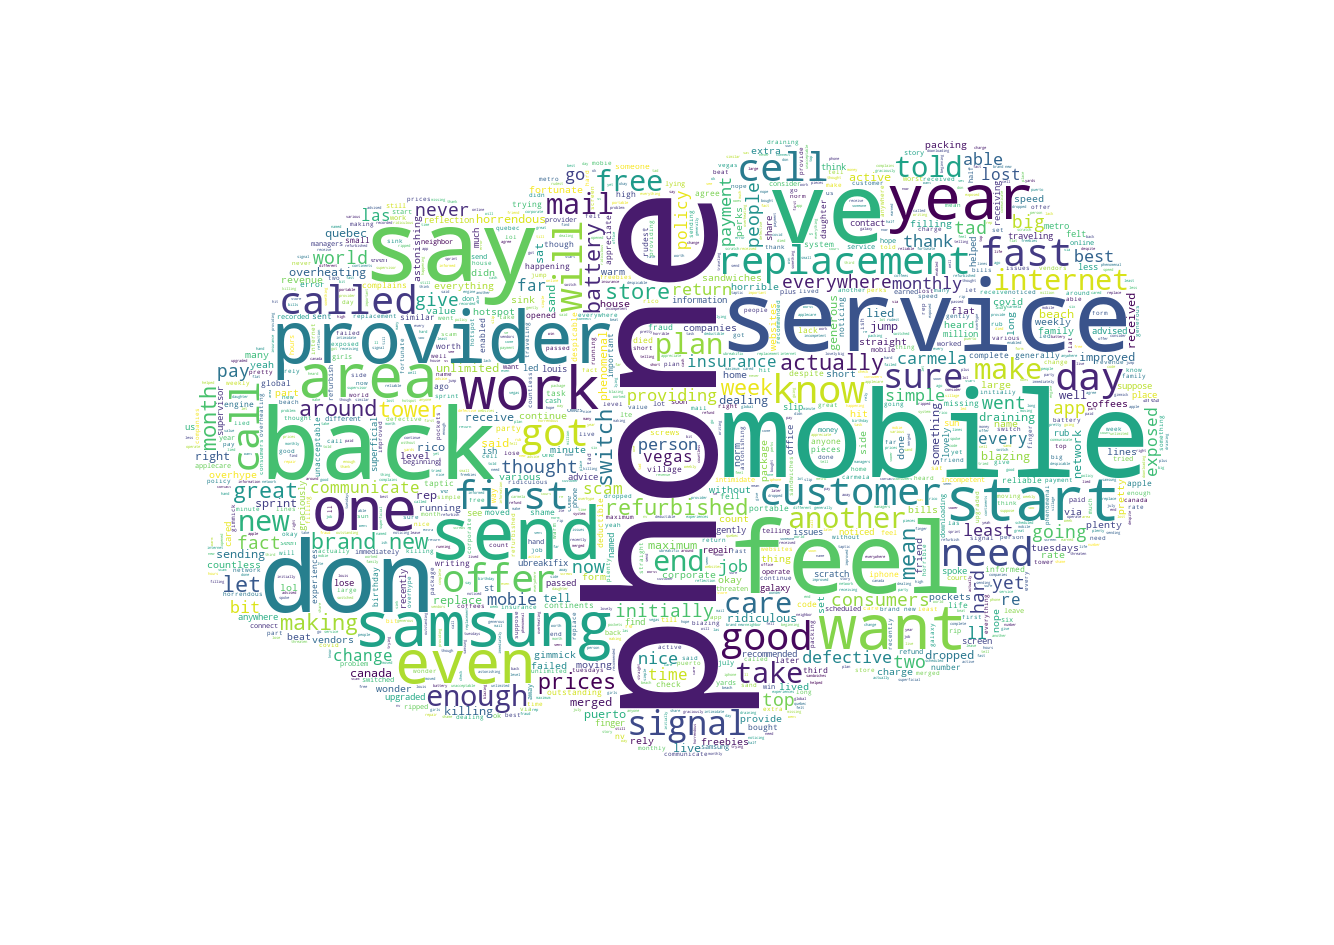

In [31]:
create_wordcloud(reviews["text"].values)

In [32]:
negative_values = reviews[reviews["sentiment"]=="negative"]
negative_values = negative_values["text"].values

In [33]:
positive_values = reviews[reviews["sentiment"]=="positive"]
positive_values = positive_values["text"].values

Word Cloud Saved Successfully


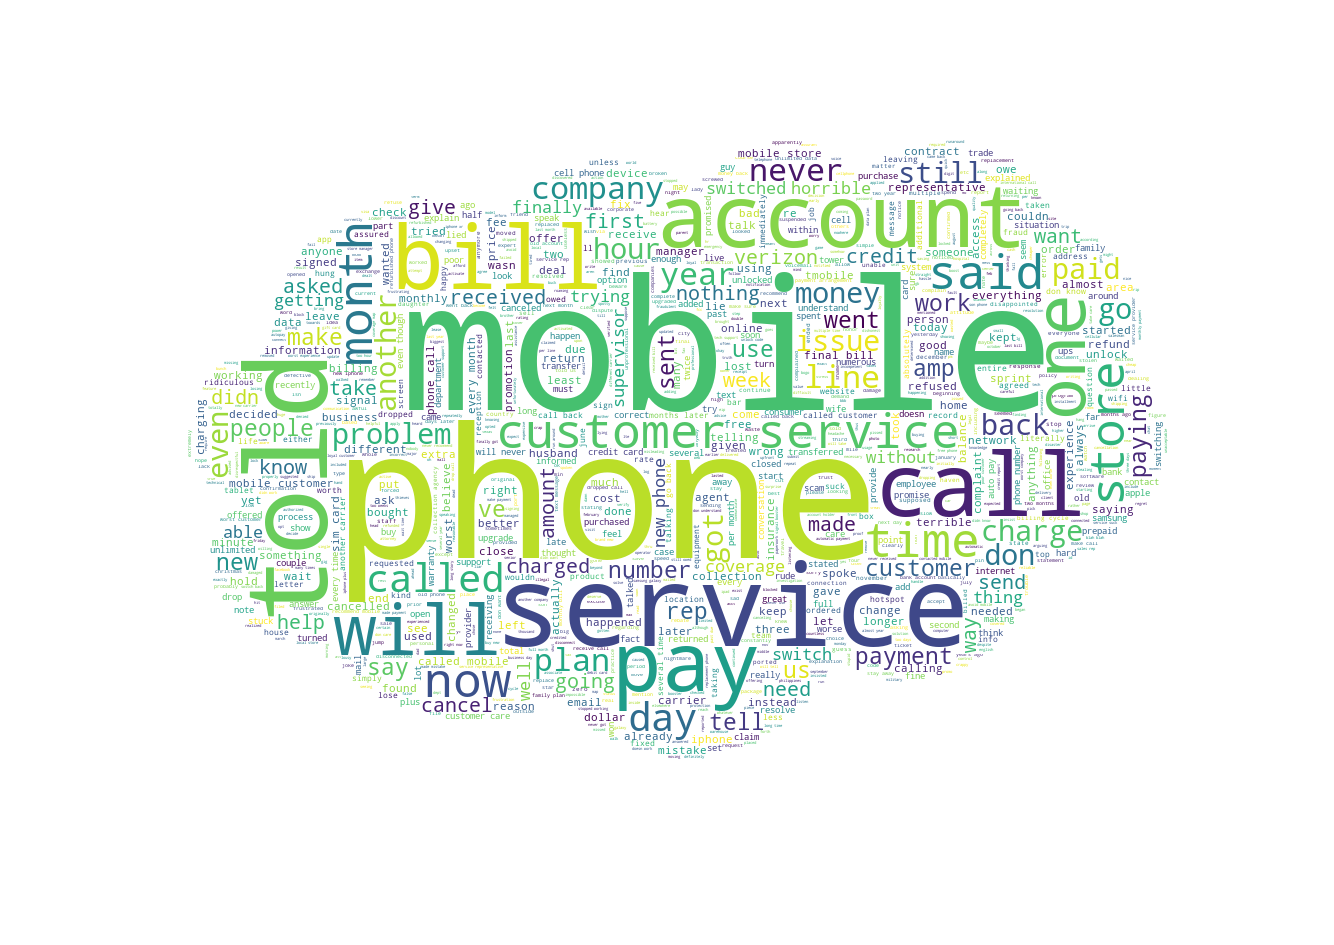

In [34]:
create_wordcloud(negative_values)

In [35]:
reviews

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,", I got on T-Mobile's network around 2013 I wa...",i got on t mobile s network around i want ...,0.153099,0.470530,positive,0.047,0.801,0.152,0.9961
1,", I recently upgraded my phone at T-Mobie to S...",i recently upgraded my phone at t mobie to s...,0.266004,0.344318,positive,0.046,0.803,0.151,0.9812
2,", I actually feel good about the cell phone pr...",i actually feel good about the cell phone pr...,0.239706,0.536134,positive,0.022,0.861,0.117,0.9299
3,", I've been with T-Mobile for 4 years now and ...",i ve been with t mobile for years now and ...,0.173571,0.627460,positive,0.050,0.889,0.061,0.4159
4,", I like Tmobile because it has affordable ser...",i like tmobile because it has affordable ser...,0.009458,0.507286,positive,0.053,0.887,0.059,0.5155
...,...,...,...,...,...,...,...,...,...
1405,", I had T-Mobile well over 10 yrs, had to canc...",i had t mobile well over yrs had to cance...,-0.055128,0.373718,negative,0.071,0.907,0.022,-0.7825
1406,", Fourteen years with T-Mobile always hoping I...",fourteen years with t mobile always hoping i...,0.126250,0.549167,positive,0.101,0.782,0.117,0.1172
1407,", I moved to Las Vegas NV over a month ago. I ...",i moved to las vegas nv over a month ago i ...,0.000000,0.000000,negative,0.108,0.868,0.025,-0.6597
1408,", I've been noticing other people have been wr...",i ve been noticing other people have been wr...,0.037207,0.431284,negative,0.130,0.821,0.050,-0.9763


In [36]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
clean = reviews

In [38]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

clean['Tweet_punct'] = reviews['text'].apply(lambda x: remove_punct(x))
clean.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct
0,", I got on T-Mobile's network around 2013 I wa...",i got on t mobile s network around i want ...,0.153099,0.470530,positive,0.047,0.801,0.152,0.9961,i got on t mobile s network around i want ...
1,", I recently upgraded my phone at T-Mobie to S...",i recently upgraded my phone at t mobie to s...,0.266004,0.344318,positive,0.046,0.803,0.151,0.9812,i recently upgraded my phone at t mobie to s...
2,", I actually feel good about the cell phone pr...",i actually feel good about the cell phone pr...,0.239706,0.536134,positive,0.022,0.861,0.117,0.9299,i actually feel good about the cell phone pr...
3,", I've been with T-Mobile for 4 years now and ...",i ve been with t mobile for years now and ...,0.173571,0.627460,positive,0.050,0.889,0.061,0.4159,i ve been with t mobile for years now and ...
4,", I like Tmobile because it has affordable ser...",i like tmobile because it has affordable ser...,0.009458,0.507286,positive,0.053,0.887,0.059,0.5155,i like tmobile because it has affordable ser...
5,", I switched to T-Mobile in September from Ver...",i switched to t mobile in september from ver...,0.057456,0.456663,positive,0.051,0.841,0.109,0.9873,i switched to t mobile in september from ver...
6,", I am being charged for a premium voice mail ...",i am being charged for a premium voice mail ...,0.000000,0.000000,negative,0.101,0.833,0.066,-0.1027,i am being charged for a premium voice mail ...
7,", I got T Mobile three days back. I received i...",i got t mobile three days back i received i...,-0.230000,0.499167,negative,0.134,0.850,0.016,-0.9738,i got t mobile three days back i received i...
8,", I cannot strongly enough discourage any and ...",i cannot strongly enough discourage any and ...,0.120201,0.460002,negative,0.073,0.875,0.052,-0.8015,i cannot strongly enough discourage any and ...
9,", My experience with Rachel at the store in Pa...",my experience with rachel at the store in pa...,0.393750,0.537500,positive,0.000,0.726,0.274,0.9809,my experience with rachel at the store in pa...


In [39]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

clean['Tweet_tokenized'] = clean['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
clean.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized
0,", I got on T-Mobile's network around 2013 I wa...",i got on t mobile s network around i want ...,0.153099,0.470530,positive,0.047,0.801,0.152,0.9961,i got on t mobile s network around i want ...,"[, i, got, on, t, mobile, s, network, around, ..."
1,", I recently upgraded my phone at T-Mobie to S...",i recently upgraded my phone at t mobie to s...,0.266004,0.344318,positive,0.046,0.803,0.151,0.9812,i recently upgraded my phone at t mobie to s...,"[, i, recently, upgraded, my, phone, at, t, mo..."
2,", I actually feel good about the cell phone pr...",i actually feel good about the cell phone pr...,0.239706,0.536134,positive,0.022,0.861,0.117,0.9299,i actually feel good about the cell phone pr...,"[, i, actually, feel, good, about, the, cell, ..."
3,", I've been with T-Mobile for 4 years now and ...",i ve been with t mobile for years now and ...,0.173571,0.627460,positive,0.050,0.889,0.061,0.4159,i ve been with t mobile for years now and ...,"[, i, ve, been, with, t, mobile, for, years, n..."
4,", I like Tmobile because it has affordable ser...",i like tmobile because it has affordable ser...,0.009458,0.507286,positive,0.053,0.887,0.059,0.5155,i like tmobile because it has affordable ser...,"[, i, like, tmobile, because, it, has, afforda..."


In [40]:
stopword = nltk.corpus.stopwords.words('english')

In [41]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
clean['Tweet_nonstop'] = clean['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
clean.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,", I got on T-Mobile's network around 2013 I wa...",i got on t mobile s network around i want ...,0.153099,0.470530,positive,0.047,0.801,0.152,0.9961,i got on t mobile s network around i want ...,"[, i, got, on, t, mobile, s, network, around, ...","[, got, mobile, network, around, want, say, ju..."
1,", I recently upgraded my phone at T-Mobie to S...",i recently upgraded my phone at t mobie to s...,0.266004,0.344318,positive,0.046,0.803,0.151,0.9812,i recently upgraded my phone at t mobie to s...,"[, i, recently, upgraded, my, phone, at, t, mo...","[, recently, upgraded, phone, mobie, samsung, ..."
2,", I actually feel good about the cell phone pr...",i actually feel good about the cell phone pr...,0.239706,0.536134,positive,0.022,0.861,0.117,0.9299,i actually feel good about the cell phone pr...,"[, i, actually, feel, good, about, the, cell, ...","[, actually, feel, good, cell, phone, provider..."
3,", I've been with T-Mobile for 4 years now and ...",i ve been with t mobile for years now and ...,0.173571,0.627460,positive,0.050,0.889,0.061,0.4159,i ve been with t mobile for years now and ...,"[, i, ve, been, with, t, mobile, for, years, n...","[, mobile, years, must, say, months, plans, pa..."
4,", I like Tmobile because it has affordable ser...",i like tmobile because it has affordable ser...,0.009458,0.507286,positive,0.053,0.887,0.059,0.5155,i like tmobile because it has affordable ser...,"[, i, like, tmobile, because, it, has, afforda...","[, like, tmobile, affordable, services, call, ..."
5,", I switched to T-Mobile in September from Ver...",i switched to t mobile in september from ver...,0.057456,0.456663,positive,0.051,0.841,0.109,0.9873,i switched to t mobile in september from ver...,"[, i, switched, to, t, mobile, in, september, ...","[, switched, mobile, september, verizon, switc..."
6,", I am being charged for a premium voice mail ...",i am being charged for a premium voice mail ...,0.000000,0.000000,negative,0.101,0.833,0.066,-0.1027,i am being charged for a premium voice mail ...,"[, i, am, being, charged, for, a, premium, voi...","[, charged, premium, voice, mail, month, even,..."
7,", I got T Mobile three days back. I received i...",i got t mobile three days back i received i...,-0.230000,0.499167,negative,0.134,0.850,0.016,-0.9738,i got t mobile three days back i received i...,"[, i, got, t, mobile, three, days, back, i, re...","[, got, mobile, three, days, back, received, i..."
8,", I cannot strongly enough discourage any and ...",i cannot strongly enough discourage any and ...,0.120201,0.460002,negative,0.073,0.875,0.052,-0.8015,i cannot strongly enough discourage any and ...,"[, i, cannot, strongly, enough, discourage, an...","[, cannot, strongly, enough, discourage, avoid..."
9,", My experience with Rachel at the store in Pa...",my experience with rachel at the store in pa...,0.393750,0.537500,positive,0.000,0.726,0.274,0.9809,my experience with rachel at the store in pa...,"[, my, experience, with, rachel, at, the, stor...","[, experience, rachel, store, palm, harbor, fl..."


In [42]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

clean['Tweet_stemmed'] = clean['Tweet_nonstop'].apply(lambda x: stemming(x))
clean.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,", I got on T-Mobile's network around 2013 I wa...",i got on t mobile s network around i want ...,0.153099,0.470530,positive,0.047,0.801,0.152,0.9961,i got on t mobile s network around i want ...,"[, i, got, on, t, mobile, s, network, around, ...","[, got, mobile, network, around, want, say, ju...","[, got, mobil, network, around, want, say, jum..."
1,", I recently upgraded my phone at T-Mobie to S...",i recently upgraded my phone at t mobie to s...,0.266004,0.344318,positive,0.046,0.803,0.151,0.9812,i recently upgraded my phone at t mobie to s...,"[, i, recently, upgraded, my, phone, at, t, mo...","[, recently, upgraded, phone, mobie, samsung, ...","[, recent, upgrad, phone, mobi, samsung, galax..."
2,", I actually feel good about the cell phone pr...",i actually feel good about the cell phone pr...,0.239706,0.536134,positive,0.022,0.861,0.117,0.9299,i actually feel good about the cell phone pr...,"[, i, actually, feel, good, about, the, cell, ...","[, actually, feel, good, cell, phone, provider...","[, actual, feel, good, cell, phone, provid, ma..."
3,", I've been with T-Mobile for 4 years now and ...",i ve been with t mobile for years now and ...,0.173571,0.627460,positive,0.050,0.889,0.061,0.4159,i ve been with t mobile for years now and ...,"[, i, ve, been, with, t, mobile, for, years, n...","[, mobile, years, must, say, months, plans, pa...","[, mobil, year, must, say, month, plan, pay, c..."
4,", I like Tmobile because it has affordable ser...",i like tmobile because it has affordable ser...,0.009458,0.507286,positive,0.053,0.887,0.059,0.5155,i like tmobile because it has affordable ser...,"[, i, like, tmobile, because, it, has, afforda...","[, like, tmobile, affordable, services, call, ...","[, like, tmobil, afford, servic, call, abroad,..."


In [43]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emreo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

clean['Tweet_lemmatized'] = clean['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
clean.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,", I got on T-Mobile's network around 2013 I wa...",i got on t mobile s network around i want ...,0.153099,0.470530,positive,0.047,0.801,0.152,0.9961,i got on t mobile s network around i want ...,"[, i, got, on, t, mobile, s, network, around, ...","[, got, mobile, network, around, want, say, ju...","[, got, mobil, network, around, want, say, jum...","[, got, mobile, network, around, want, say, ju..."
1,", I recently upgraded my phone at T-Mobie to S...",i recently upgraded my phone at t mobie to s...,0.266004,0.344318,positive,0.046,0.803,0.151,0.9812,i recently upgraded my phone at t mobie to s...,"[, i, recently, upgraded, my, phone, at, t, mo...","[, recently, upgraded, phone, mobie, samsung, ...","[, recent, upgrad, phone, mobi, samsung, galax...","[, recently, upgraded, phone, mobie, samsung, ..."
2,", I actually feel good about the cell phone pr...",i actually feel good about the cell phone pr...,0.239706,0.536134,positive,0.022,0.861,0.117,0.9299,i actually feel good about the cell phone pr...,"[, i, actually, feel, good, about, the, cell, ...","[, actually, feel, good, cell, phone, provider...","[, actual, feel, good, cell, phone, provid, ma...","[, actually, feel, good, cell, phone, provider..."
3,", I've been with T-Mobile for 4 years now and ...",i ve been with t mobile for years now and ...,0.173571,0.627460,positive,0.050,0.889,0.061,0.4159,i ve been with t mobile for years now and ...,"[, i, ve, been, with, t, mobile, for, years, n...","[, mobile, years, must, say, months, plans, pa...","[, mobil, year, must, say, month, plan, pay, c...","[, mobile, year, must, say, month, plan, pay, ..."
4,", I like Tmobile because it has affordable ser...",i like tmobile because it has affordable ser...,0.009458,0.507286,positive,0.053,0.887,0.059,0.5155,i like tmobile because it has affordable ser...,"[, i, like, tmobile, because, it, has, afforda...","[, like, tmobile, affordable, services, call, ...","[, like, tmobil, afford, servic, call, abroad,...","[, like, tmobile, affordable, service, call, a..."


In [45]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [46]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(clean['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
print(countVectorizer.get_feature_names())

1400 Number of reviews has 4524 words
['', 'aaaagghhh', 'abhorr', 'abil', 'abl', 'aboard', 'abroad', 'abrupt', 'abruptli', 'absolut', 'abus', 'abysm', 'accent', 'accept', 'access', 'accessori', 'accid', 'accident', 'accommod', 'accomplish', 'accondiscend', 'accord', 'accordingli', 'account', 'accru', 'acct', 'accumul', 'accur', 'accus', 'achiev', 'acknowledg', 'acquir', 'acquisit', 'across', 'act', 'action', 'activ', 'actor', 'actual', 'ad', 'ada', 'adam', 'add', 'addit', 'address', 'adequ', 'adher', 'adjoin', 'adjust', 'administr', 'admit', 'admittedli', 'admonish', 'adopt', 'adrian', 'adult', 'advanc', 'advantag', 'adventur', 'advertis', 'advic', 'advis', 'advisor', 'advisori', 'advoc', 'aerospac', 'affair', 'affect', 'afford', 'affront', 'afraid', 'aftermath', 'afternoon', 'afterward', 'ag', 'age', 'agenc', 'agent', 'aggrav', 'aggress', 'ago', 'agre', 'agreement', 'ahead', 'ahhhh', 'ahold', 'aid', 'aiea', 'aim', 'air', 'aircard', 'airlin', 'airport', 'aka', 'akron', 'al', 'ala', 'al

In [47]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aaaagghhh,abhorr,abil,abl,aboard,abroad,abrupt,abruptli,absolut,...,yup,yvatt,z,zach,zero,zillion,zip,zmax,zone,zte
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
count = pd.DataFrame(count_vect_df.sum())

In [49]:
count.sort_values(0,ascending=False).head(20)

,0
mobil,3020
phone,2884
,2784
servic,2083
call,1895
custom,1457
get,1195
bill,1079
would,1017
told,933


In [50]:
reviews['text_len'] = reviews['text'].astype(str).apply(len)
reviews['text_word_count'] = reviews['text'].apply(lambda x: len(str(x).split()))
reviews.mean()

polarity             0.054529
subjectivity         0.481565
neg                  0.087496
neu                  0.813806
pos                  0.098711
compound            -0.024954
text_len           871.800000
text_word_count    164.906429
dtype: float64

In [51]:
round(pd.DataFrame(reviews.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,176.92
neutral,179.00
positive,151.83


In [52]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [53]:
review_negative = reviews[reviews["sentiment"]=="negative"]
review_positive = reviews[reviews["sentiment"]=="positive"]

n2_bigrams_negative = get_top_n_gram(review_negative['text'],(2,2),20)
n2_bigrams_positive = get_top_n_gram(review_positive['text'],(2,2),20)

n3_bigrams_negative = get_top_n_gram(review_negative['text'],(3,3),20)
n3_bigrams_positive = get_top_n_gram(review_positive['text'],(3,3),20)

In [54]:
n2_bigrams_negative

[('customer service', 385),
 ('mobile customer', 88),
 ('called mobile', 83),
 ('new phone', 81),
 ('mobile store', 70),
 ('mobile years', 68),
 ('phone service', 49),
 ('sim card', 46),
 ('cell phone', 44),
 ('service mobile', 43),
 ('called customer', 39),
 ('credit card', 37),
 ('customer care', 36),
 ('phone mobile', 36),
 ('phone number', 35),
 ('phone calls', 34),
 ('auto pay', 32),
 ('went store', 29),
 ('customer years', 29),
 ('unlock phone', 29)]

In [55]:
n3_bigrams_negative

[('mobile customer service', 45),
 ('called customer service', 26),
 ('worst customer service', 18),
 ('mobile customer years', 16),
 ('customer service rep', 14),
 ('customer service representative', 12),
 ('called mobile customer', 11),
 ('went mobile store', 11),
 ('poor customer service', 11),
 ('customer service told', 10),
 ('service customer service', 10),
 ('stay away mobile', 10),
 ('spent hours phone', 9),
 ('phone customer service', 9),
 ('called customer care', 9),
 ('customer service mobile', 8),
 ('customer service times', 8),
 ('customer service worst', 8),
 ('long story short', 8),
 ('ve mobile years', 8)]